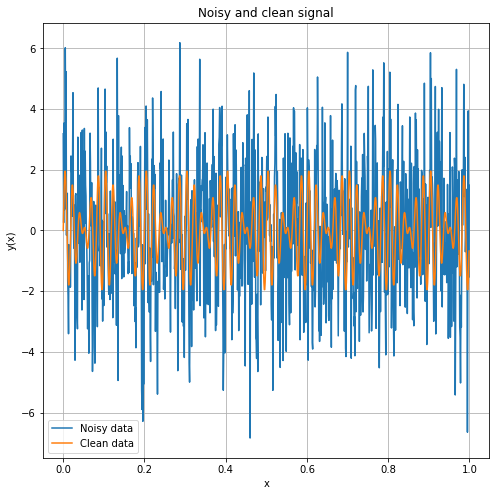

In [85]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]

## Parameters of the wave

f1 = 50
f2 = 60
dt = 0.001
x = np.arange(0,1,dt)

y = np.sin(2*np.pi*f1*x) + np.sin(2*np.pi*f2*x)

# adding noise to data
y_clean = y
y = y + 2*np.random.randn(len(x))

plt.plot(x,y,label='Noisy data')
plt.plot(x,y_clean,label='Clean data')
plt.title('Noisy and clean signal')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

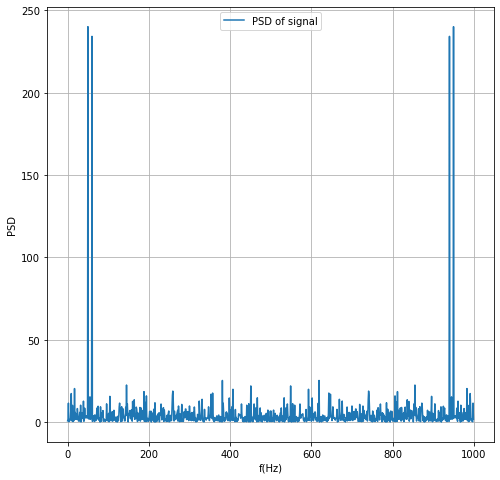

In [86]:
n = len(x)

# y_hat is the dft of y
y_hat = np.fft.fft(y,n)

# Computing the PSD
PSD = (y_hat * np.conj(y_hat))/n
PSD = np.real(PSD)

# Creating the x axis values for frequency and selecting an appropriate length from it
freq = np.arange(n)/(n*dt)
L = n

# plotting the PSD
plt.plot(freq,PSD, label='PSD of signal')
plt.xlabel('f(Hz)')
plt.ylabel('PSD')
plt.grid()
plt.legend()
plt.show()

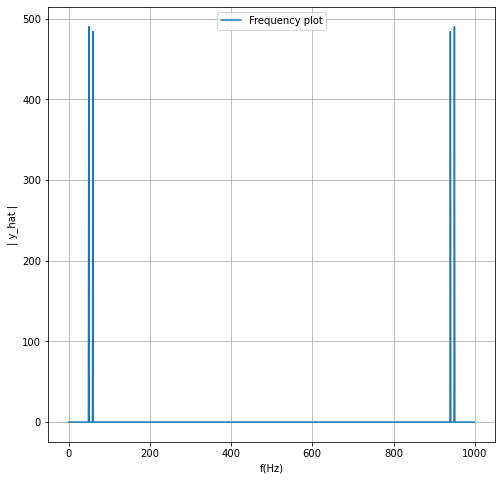

In [87]:
''' As clearly seen from the PSD plot there are four PSD that stand out from the rest of the PSDs, turns out
that, they are the actual four frequencies present in the noise signal. Lets remove the noise from the signal'''

i = PSD > 100 # returns true if Value is greater that 100 else false
y_rec = y_hat * i

plt.plot(freq, np.abs(y_rec), label='Frequency plot')
plt.xlabel('f(Hz)')
plt.ylabel('| y_hat |')
plt.grid()
plt.legend()
plt.show()

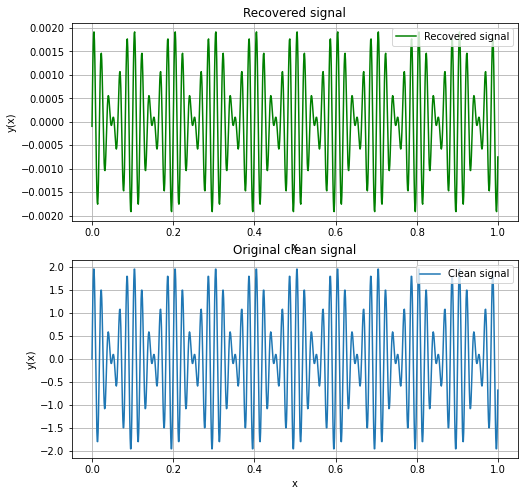

In [88]:
# Now convert from clean to noisy signal

f = np.fft.ifft(y_rec)
f = np.real(f)
f = f/n

plt.subplot(2,1,1)
plt.plot(x,f,label='Recovered signal',c='g')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Recovered signal')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,y_clean,label='Clean signal')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Original clean signal')
plt.grid()
plt.legend()

plt.show()